In [1]:
import matplotlib
import matplotlib.pyplot as plt
import glob
import numpy as np
import os
from scipy import signal
import pickle


%matplotlib widget

In [2]:
data_file = '../Data/data_VIP.pkl'

with open(data_file, 'rb') as f:
    loaded_data = pickle.load(f)

traces = loaded_data['traces']
stim_starts = loaded_data['stim_starts']
stim_ends = loaded_data['stim_ends']
stims = loaded_data['stims']
spikes = loaded_data['spikes']
cell_infos = loaded_data['cell_infos']

motor_start = traces[0].shape[0]//2 + 1

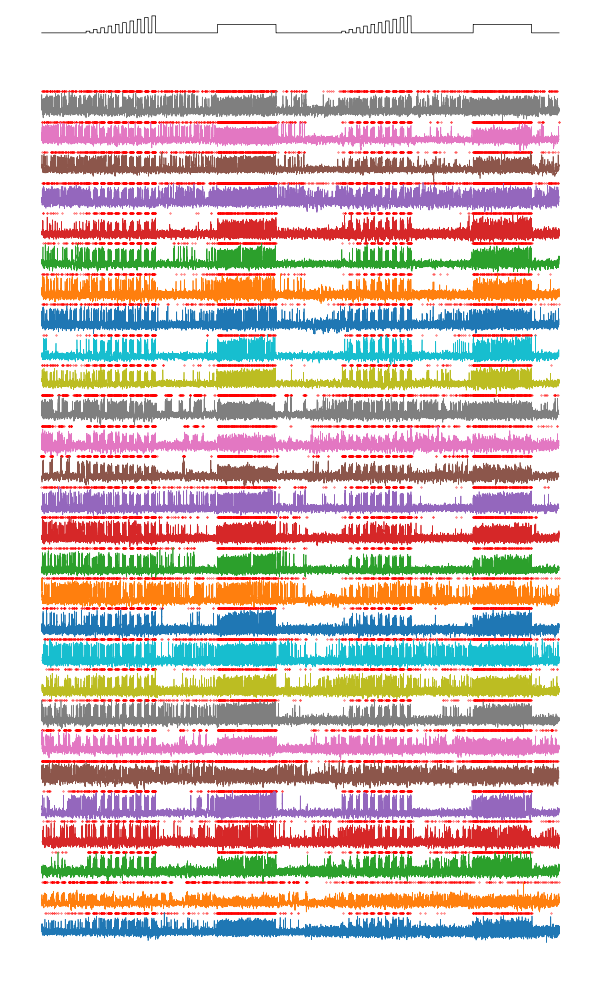

In [3]:
def normalize(trace):
    trace = trace - np.mean(trace)
    trace = trace / np.max(np.abs(trace))
    return trace

def normalize_plot(trace):
    #Calculate min and max of the original data
    min_trace = np.min(trace)
    max_trace = np.max(trace)

    # Normalize the trace to [0, 0.95]
    trace = (trace - min_trace) * (0.98 - 0) / (max_trace - min_trace) + 0
    return trace


# Note this is a visualization of the overall dataset, when you analyze the firing rate or subthreshold activity, 
# you should use the stim_starts and stim_ends to isolated different conditions

fig,axes = plt.subplots(2,1,figsize=(6,10),gridspec_kw={'height_ratios': [1, 50]}, sharex=True)

cell_ref = 0 
# plot the stimulus
axes[0].plot(stims[cell_ref], color='k', linewidth=0.5)


for i,trace in enumerate(traces):
    trace[:5]=0
    offset = stim_starts[i][0] - stim_starts[cell_ref][0]
    # if offset is negative, pad the trace with zeros at the beginning and remove the last offset elements
    if offset < 0:
        trace = np.pad(trace, ((-offset ,0)), 'constant')
        trace = trace[:offset]
    # if offset is positive, pad the trace with zeros at the end and remove the first offset elements
    elif offset > 0:
        trace = np.pad(trace, ((0, offset)), 'constant')
        trace = trace[offset:]

    trace = normalize_plot(trace) + i
    axes[1].plot(trace, linewidth=0.5)
    axes[1].scatter(spikes[i]-offset, np.ones_like(spikes[i])*i+0.98, color='r', s=0.1)

# turn off the axes
axes[0].axis('off')
axes[1].axis('off')

# tight layout
plt.tight_layout()
plt.show()